In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('vif_data.csv')

In [3]:
df.head()

,Unnamed: 0,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No_of_Times_Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Zipcode_table_Zipcode_2,Zipcode_table_Zipcode_3,Zipcode_table_Zipcode_4,Zipcode_table_Zipcode_5,Zipcode_table_Zipcode_6,Zipcode_table_Zipcode_7,Zipcode_table_Zipcode_8,Zipcode_table_Zipcode_9,Zipcode_table_Zipcode_10,sale_price
0,0,3,1.00,5650.0,1.0,0,2,7,1180.0,0,...,1,0,0,0,0,0,0,0,0,221900.0
1,1,3,2.25,7242.0,2.0,0,2,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,538000.0
2,2,2,1.00,10000.0,1.0,0,2,6,770.0,0,...,0,0,1,0,0,0,0,0,0,180000.0
3,3,4,3.00,5000.0,1.0,0,3,7,1050.0,910,...,0,0,0,0,1,0,0,0,0,604000.0
4,4,3,2.00,8080.0,1.0,0,2,8,1680.0,0,...,0,0,0,0,0,0,1,0,0,510000.0


In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
x = df.drop(['sale_price'],axis=1)
y = df['sale_price']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [8]:
x_train.shape, x_test.shape, y_train.shape , y_test.shape

((17287, 25), (4322, 25), (17287,), (4322,))

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scale = StandardScaler()

In [11]:
x_train = scale.fit_transform(x_train)

In [12]:
x_train

array([[ 0.67849763,  0.17628744, -0.13672473, ..., -0.33539701,
        -0.20695513,  5.7824091 ],
       [-0.39757471,  0.50121344, -0.31713296, ..., -0.33539701,
        -0.20695513, -0.1729383 ],
       [ 1.75456997,  0.50121344, -0.25619645, ..., -0.33539701,
        -0.20695513, -0.1729383 ],
       ...,
       [-0.39757471, -1.44834258, -0.16884539, ..., -0.33539701,
        -0.20695513, -0.1729383 ],
       [ 0.67849763, -0.47356457, -0.14920685, ..., -0.33539701,
        -0.20695513, -0.1729383 ],
       [ 0.67849763,  0.17628744, -0.19200269, ..., -0.33539701,
         4.83196516, -0.1729383 ]])

In [13]:
x_test = scale.fit_transform(x_test)

In [14]:
x_test

array([[ 0.66938228,  0.49679891, -0.22877615, ..., -0.34428189,
        -0.21737023, -0.18764216],
       [ 0.66938228, -0.15022983, -0.1519448 , ..., -0.34428189,
        -0.21737023, -0.18764216],
       [ 0.66938228,  0.49679891, -0.25282142, ..., -0.34428189,
         4.60044591, -0.18764216],
       ...,
       [ 0.66938228,  0.49679891, -0.11156836, ..., -0.34428189,
        -0.21737023,  5.32929269],
       [-0.40331709,  0.49679891,  0.30777908, ..., -0.34428189,
        -0.21737023, -0.18764216],
       [-0.40331709,  0.17328454, -0.33625747, ..., -0.34428189,
        -0.21737023, -0.18764216]])

In [15]:
from sklearn.ensemble import ExtraTreesRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [16]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# extra trees regressor

In [17]:
model = ExtraTreesRegressor()

model.fit(x_train,y_train)
prediction = model.predict(x_test)

In [18]:
r2_score = r2_score(y_test,prediction)
mae = mean_absolute_error(y_test,prediction)
mse = mean_squared_error(y_test,prediction)
rmse = mse ** 0.5

In [19]:
print(f'r2_score : {r2_score}')
print(f'mae : {mae}')
print(f'mse : {mse}')
print(f'rmse : {rmse}')

r2_score : 0.8779384258839391
mae : 49647.05273831559
mse : 4820165012.512641
rmse : 69427.40822263669


(800000.0, -800000.0)

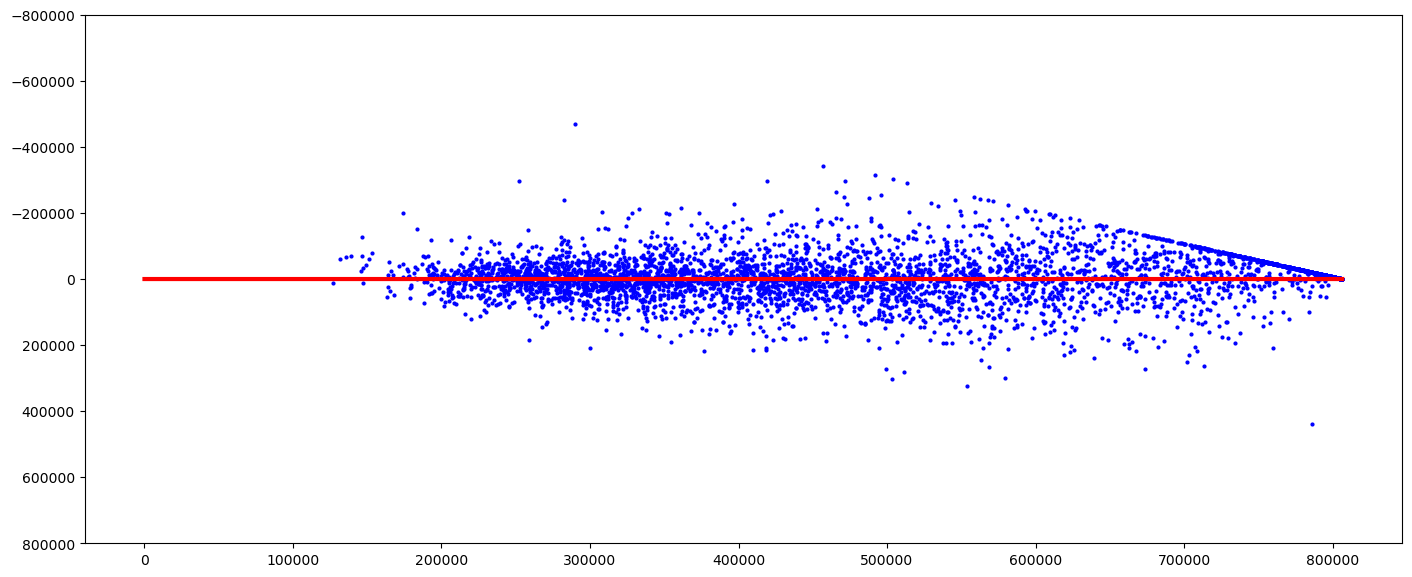

In [20]:
# residuals

residual = prediction - y_test

residual_table = pd.DataFrame({'residuals' : residual,'predictions' : prediction})
residual_table = residual_table.sort_values(by='predictions')

z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

plt.figure(figsize=(17,7),dpi=100)
plt.scatter(residual_table['predictions'],residual_table['residuals'],color='blue',s=4)
plt.plot(z,k,color='red',linewidth=3)
plt.ylim(800000,-800000)

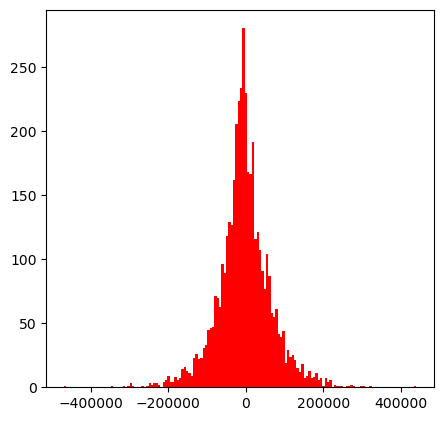

In [21]:
# error distribution

plt.figure(figsize=(5,5),dpi=100)
plt.hist(residual_table['residuals'],color='red',bins=150)
plt.show()

# bagging regressor

In [22]:
model = BaggingRegressor()

model.fit(x_train,y_train)
prediction = model.predict(x_test)
r2_score = model.score(x_test,y_test)

In [23]:
mae = mean_absolute_error(y_test,prediction)
mse = mean_squared_error(y_test,prediction)
rmse = mse ** 0.5

In [24]:
print(f'r2_score : {r2_score}')
print(f'mae : {mae}')
print(f'mse : {mse}')
print(f'rmse : {rmse}')

r2_score : 0.8583416131952755
mae : 53086.124974659
mse : 5594035672.158925
rmse : 74793.28627730516


(800000.0, -800000.0)

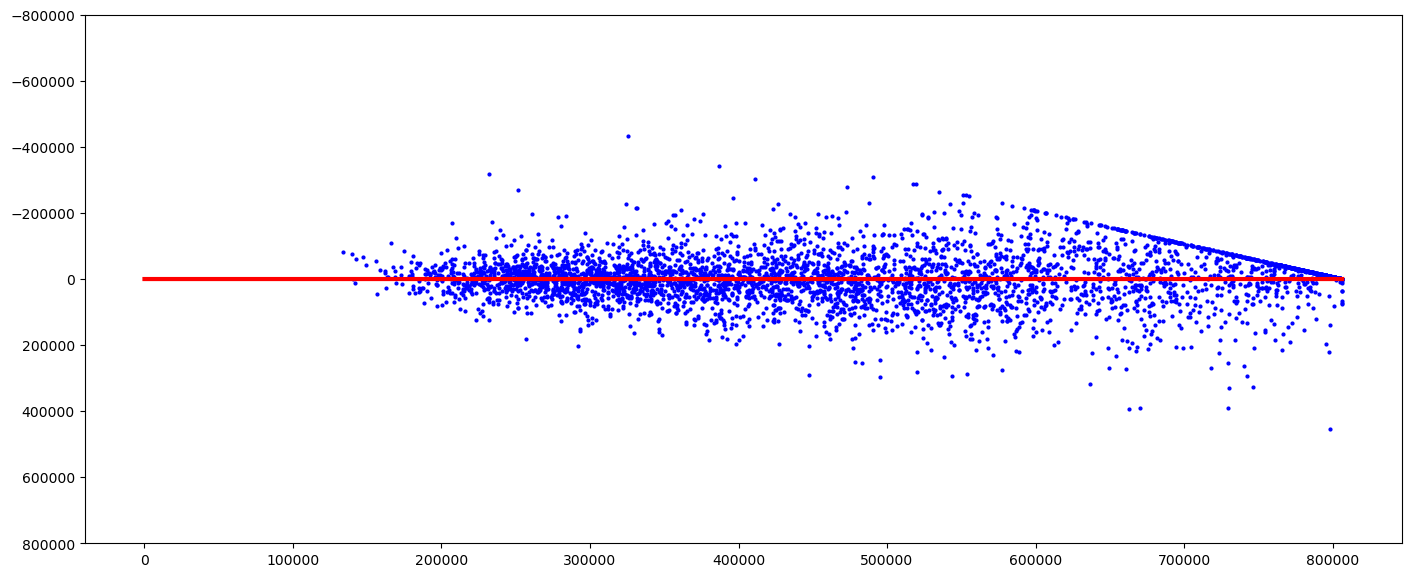

In [25]:
# residuals

residual = prediction - y_test

residual_table = pd.DataFrame({'residuals' : residual,'predictions' : prediction})
residual_table = residual_table.sort_values(by='predictions')

z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

plt.figure(figsize=(17,7),dpi=100)
plt.scatter(residual_table['predictions'],residual_table['residuals'],color='blue',s=4)
plt.plot(z,k,color='red',linewidth=3)
plt.ylim(800000,-800000)

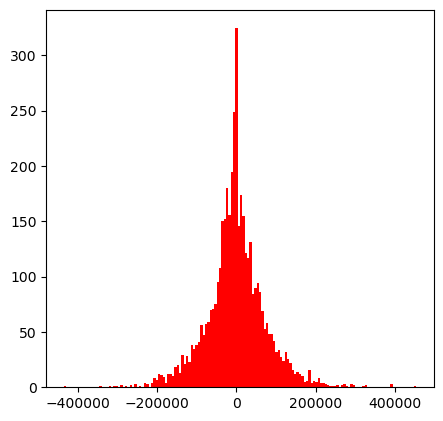

In [26]:
# error distribution

plt.figure(figsize=(5,5),dpi=100)
plt.hist(residual_table['residuals'],color='red',bins=150)
plt.show()

# AdaBoostRegressor

In [27]:
model = AdaBoostRegressor()

model.fit(x_train,y_train)
prediction = model.predict(x_test)

In [28]:
r2_score = model.score(x_test,y_test)
mae = mean_absolute_error(y_test,prediction)
mse = mean_squared_error(y_test,prediction)
rmse = mse ** 0.5

In [29]:
print(f'r2_score : {r2_score}')
print(f'mae : {mae}')
print(f'mse : {mse}')
print(f'rmse : {rmse}')

r2_score : 0.542390138176541
mae : 115638.55200355942
mse : 18070838929.578793
rmse : 134427.82051933592


(800000.0, -800000.0)

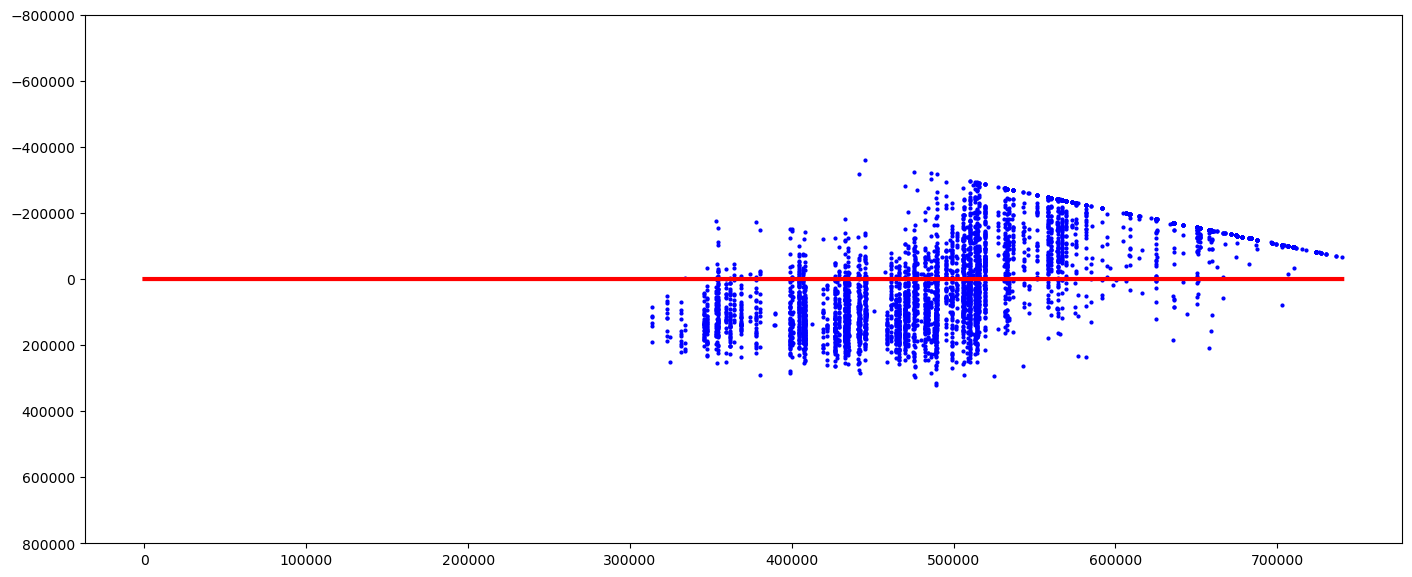

In [30]:
# residuals

residual = prediction - y_test

residual_table = pd.DataFrame({'residuals' : residual,'predictions' : prediction})
residual_table = residual_table.sort_values(by='predictions')

z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

plt.figure(figsize=(17,7),dpi=100)
plt.scatter(residual_table['predictions'],residual_table['residuals'],color='blue',s=4)
plt.plot(z,k,color='red',linewidth=3)
plt.ylim(800000,-800000)

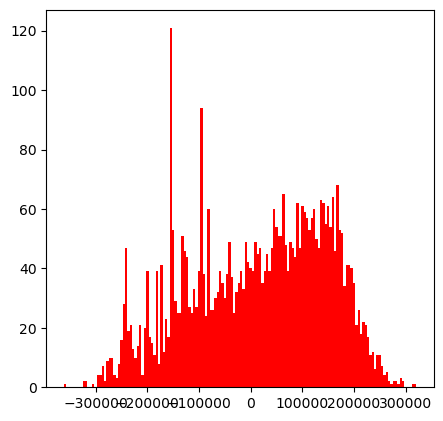

In [31]:
# error distribution

plt.figure(figsize=(5,5),dpi=100)
plt.hist(residual_table['residuals'],color='red',bins=150)
plt.show()

# GradientBoostingRegressor

In [32]:
model = GradientBoostingRegressor()

model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [33]:
r2_score = model.score(x_test,y_test)
mae = mean_absolute_error(y_test,prediction)
mse = mean_squared_error(y_test,prediction)
rmse = mse ** 0.5

In [34]:
print(f'r2_score : {r2_score}')
print(f'mae : {mae}')
print(f'mse : {mse}')
print(f'rmse : {rmse}')

r2_score : 0.8363551313619543
mae : 115638.55200355942
mse : 18070838929.578793
rmse : 134427.82051933592


(800000.0, -800000.0)

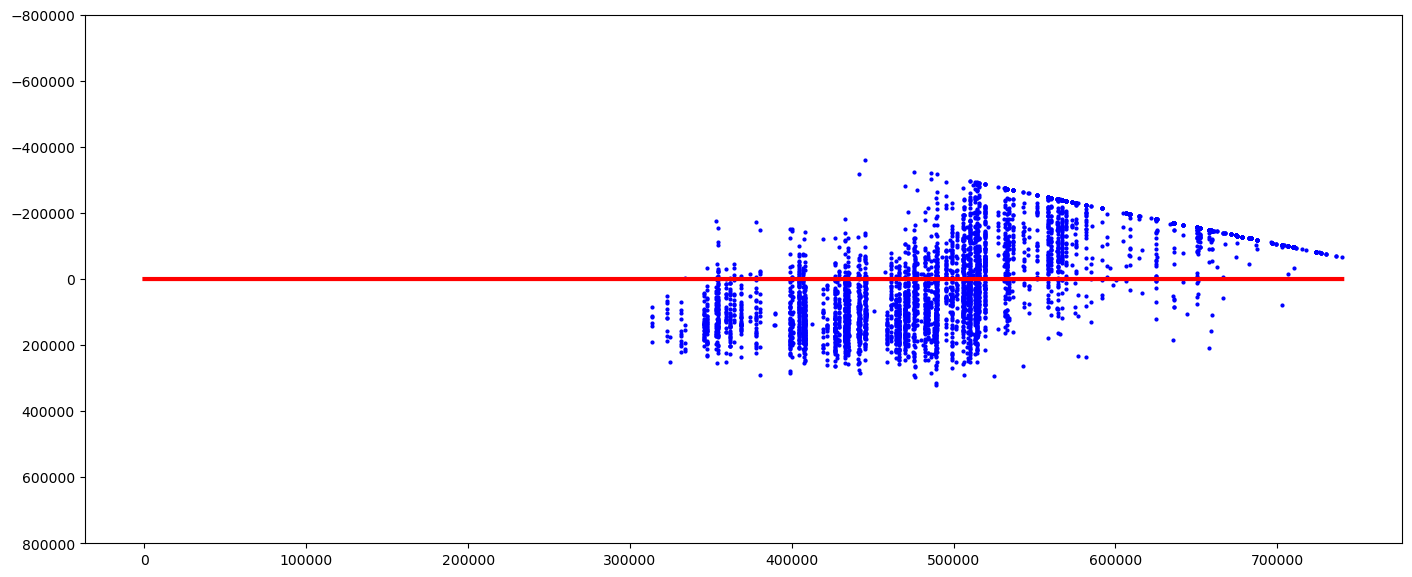

In [35]:
# residuals

residual = prediction - y_test

residual_table = pd.DataFrame({'residuals' : residual,'predictions' : prediction})
residual_table = residual_table.sort_values(by='predictions')

z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

plt.figure(figsize=(17,7),dpi=100)
plt.scatter(residual_table['predictions'],residual_table['residuals'],color='blue',s=4)
plt.plot(z,k,color='red',linewidth=3)
plt.ylim(800000,-800000)

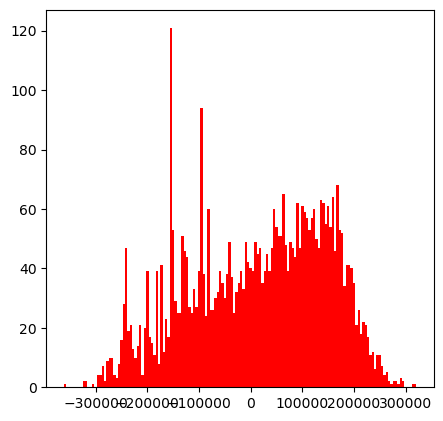

In [36]:
# error distribution

plt.figure(figsize=(5,5),dpi=100)
plt.hist(residual_table['residuals'],color='red',bins=150)
plt.show()